In [26]:
import pandas as pd
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [27]:
archivo = 'Base alumnos prepa.csv'
data = pd.read_csv(archivo, encoding = 'latin-1')


In [28]:
ubicacion_actual = os.getcwd()

print("La ubicación actual es:",ubicacion_actual)

La ubicación actual es: c:\Users\ISAAC\Downloads\Mineria de Datos\Mineria-de-Datos


In [29]:
data.shape

(6000, 19)

In [30]:
data.columns

Index(['ID_TEXT', 'ID_TEXT.1', 'CIUDAD', 'TIPO',
       'UNIVERSIDAD_EVALUADA_NACIONAL', 'PRESTIGIO DE LA INSTITUCIÓN',
       'NIVEL ACADÉMICO', 'OFERTA ACADÉMICA (CARRERAS OFERTADAS)',
       'PROFESORES', 'PROGRAMAS DE BECAS',
       'COSTO DE COLEGIATURA Y OPCIONES DE PAGO',
       'INSTALACIONES, AULAS Y LABORATORIOS', 'PLAN DE ESTUDIOS',
       'AMBIENTE ESTUDIANTIL', 'ACREDITACIONES Y CERTIFICACIONES',
       'UBICACIÓN DEL CAMPUS', 'MODALIDADES HÍBRIDAS (PRESENCIAL Y ONLINE)',
       'MODALIDADES ONLINE', 'VALORES INSTITUCIONALES'],
      dtype='object')

In [31]:
# --- Limpieza inicial ---
# 1. Eliminar duplicados
data = data.drop_duplicates()

# 2. Eliminar registros con valores faltantes en variables clave
data = data.dropna(subset=[
    "PRESTIGIO DE LA INSTITUCIÓN",
    "COSTO DE COLEGIATURA Y OPCIONES DE PAGO"
])

print("Dimensiones después de limpieza:", data.shape)

# --- Vista rápida de los datos ---
data.head()

Dimensiones después de limpieza: (6000, 19)


,ID_TEXT,ID_TEXT.1,CIUDAD,TIPO,UNIVERSIDAD_EVALUADA_NACIONAL,PRESTIGIO DE LA INSTITUCIÓN,NIVEL ACADÉMICO,OFERTA ACADÉMICA (CARRERAS OFERTADAS),PROFESORES,PROGRAMAS DE BECAS,COSTO DE COLEGIATURA Y OPCIONES DE PAGO,"INSTALACIONES, AULAS Y LABORATORIOS",PLAN DE ESTUDIOS,AMBIENTE ESTUDIANTIL,ACREDITACIONES Y CERTIFICACIONES,UBICACIÓN DEL CAMPUS,MODALIDADES HÍBRIDAS (PRESENCIAL Y ONLINE),MODALIDADES ONLINE,VALORES INSTITUCIONALES
0,Entrevistado_1,Entrevistado_1,AGUASCALIENTES,Primera mención,UVM,10.0,8.0,2.0,6.0,1.0,5.8,6.4,6.5,7.7,6.4,7.5,7.3,7.3,6.9
1,Entrevistado_2,Entrevistado_2,MORELIA,Primera mención,OTRAS1,7.0,8.0,8.0,8.0,6.4,4.0,5.0,6.5,7.7,6.4,7.5,7.3,7.3,6.9
2,Entrevistado_3,Entrevistado_3,MONTERREY,Primera mención,ITESM,10.0,5.0,5.0,8.0,8.0,10.0,6.4,6.5,7.7,6.4,7.5,7.3,7.3,6.9
3,Entrevistado_4,Entrevistado_4,GUADALAJARA,Primera mención,OTRAS1,8.0,6.0,6.0,9.0,6.4,4.0,6.4,6.5,7.7,6.4,7.5,7.3,7.3,6.9
4,Entrevistado_5,Entrevistado_5,CANCÚN,Primera mención,UNID,9.0,9.0,7.8,4.0,1.0,5.0,6.4,6.5,7.7,6.4,7.5,7.3,7.3,6.9


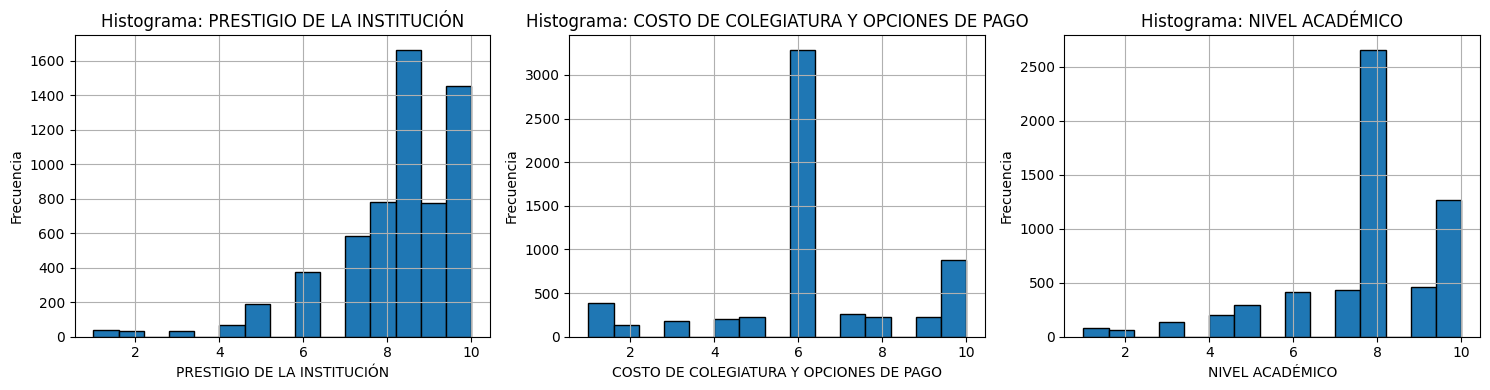

In [32]:
# ==== 2) EXPLORACIÓN RÁPIDA ====
import matplotlib.pyplot as plt

variables_explorar = [
    "PRESTIGIO DE LA INSTITUCIÓN",
    "COSTO DE COLEGIATURA Y OPCIONES DE PAGO",
    "NIVEL ACADÉMICO"
]

plt.figure(figsize=(15,4))

for i, var in enumerate(variables_explorar, 1):
    plt.subplot(1, 3, i)
    data[var].hist(bins=15, edgecolor='black')
    plt.title(f"Histograma: {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


In [33]:
#  3) SELECCIÓN DE VARIABLES + ESTANDARIZACIÓN 
from sklearn.preprocessing import StandardScaler

#  Selección de variables 
variables = [
    "PRESTIGIO DE LA INSTITUCIÓN",
    "COSTO DE COLEGIATURA Y OPCIONES DE PAGO"
]

X = data[variables].copy()

#  Estandarización 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verificación
print("Primeras 5 filas (original):")
print(X.head())

print("\nPrimeras 5 filas (escaladas):")
print(X_scaled[:5])


Primeras 5 filas (original):
   PRESTIGIO DE LA INSTITUCIÓN  COSTO DE COLEGIATURA Y OPCIONES DE PAGO
0                         10.0                                      5.8
1                          7.0                                      4.0
2                         10.0                                     10.0
3                          8.0                                      4.0
4                          9.0                                      5.0

Primeras 5 filas (escaladas):
[[ 1.09181105 -0.13457956]
 [-0.78114935 -0.91828454]
 [ 1.09181105  1.69406539]
 [-0.15682922 -0.91828454]
 [ 0.46749092 -0.48289289]]


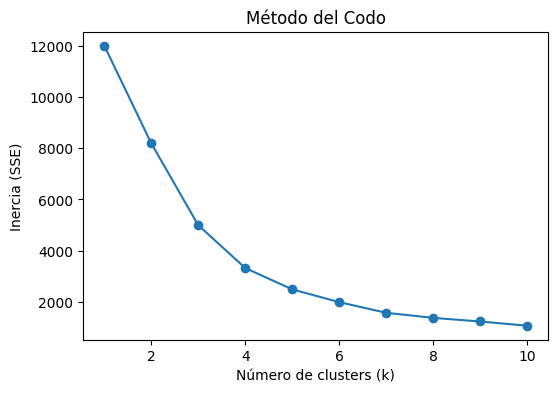

In [34]:
#  4) DETERMINACIÓN DEL NÚMERO DE CLUSTERS (Método del Codo) 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_use = X_scaled  # datos estandarizados

inertias = []
K = range(1, 11)  # probamos entre 1 y 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_use)
    inertias.append(kmeans.inertia_)

# Gráfica del método del codo
plt.figure(figsize=(6,4))
plt.plot(K, inertias, 'o-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (SSE)')
plt.title('Método del Codo')
plt.show()


k óptimo (codo por distancia máxima): 4


C:\Users\ISAAC\AppData\Local\Temp\ipykernel_10108\1000725424.py:20: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  dist = np.abs(np.cross(p2 - p1, points - p1)) / np.linalg.norm(p2 - p1)


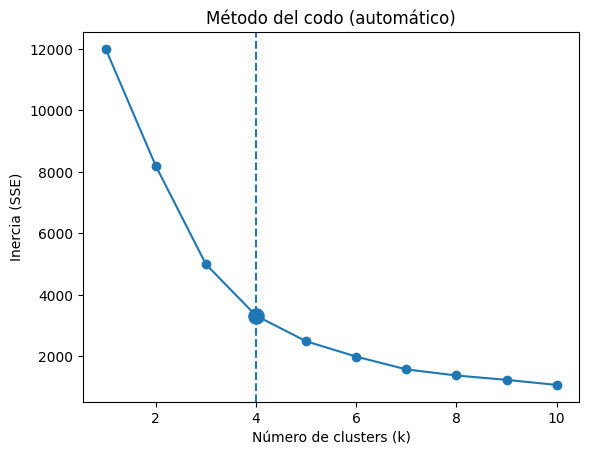

In [35]:
import numpy as np

inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42, max_iter=200)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Conversión a arrays
ks = np.array(list(K))
ys = np.array(inertias)

# Línea entre primer y último punto
p1 = np.array([ks[0], ys[0]])
p2 = np.array([ks[-1], ys[-1]])

# Distancia perpendicular de cada punto a la recta p1-p2
points = np.column_stack((ks, ys))
dist = np.abs(np.cross(p2 - p1, points - p1)) / np.linalg.norm(p2 - p1)

# k óptimo (punto con máxima distancia)
k_opt = int(ks[np.argmax(dist)])
print(f"k óptimo (codo por distancia máxima): {k_opt}")

# Gráfico con codo marcado
plt.plot(ks, ys, 'o-')
plt.axvline(k_opt, ls='--', lw=1.5)
plt.scatter([k_opt], [ys[ks == k_opt][0]], s=120, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (SSE)')
plt.title('Método del codo (automático)')
plt.show()

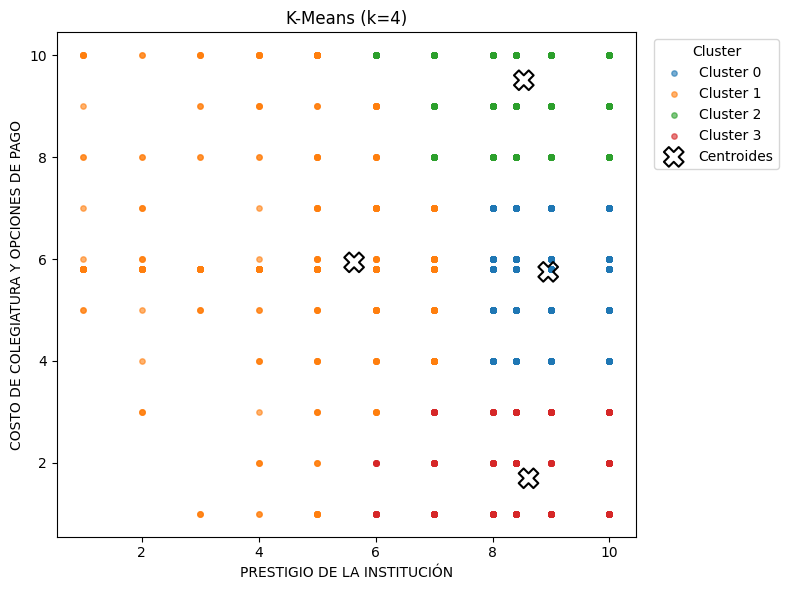

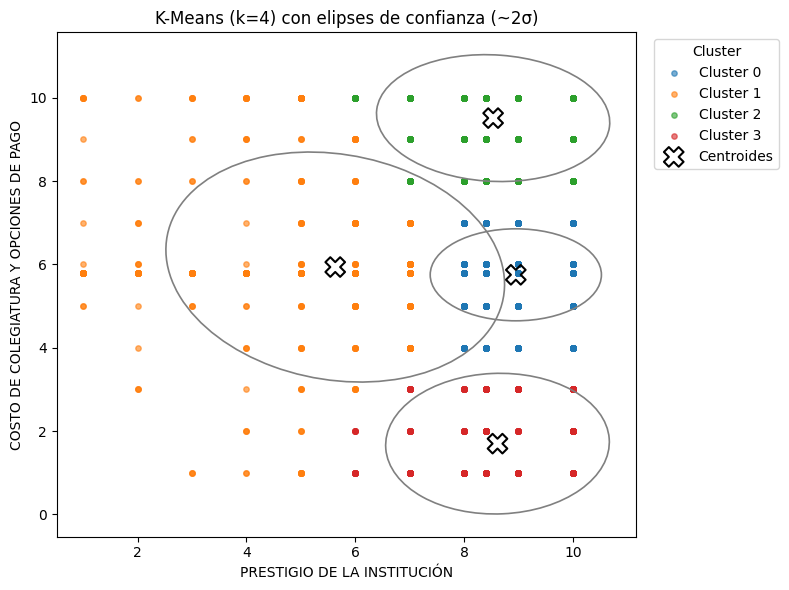

labels_ (primeros 60): [0 1 2 0 0 0 0 0 0 0 0 2 3 2 0 1 0 2 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 3 0 0
 0 0 0 0 3 1 3 0 0 0 2 0 2 2 3 3 1 1 0 1 1 1 1]

cluster_centers_ (escala estandarizada):
 [[ 0.43767203 -0.15685409]
 [-1.63488473 -0.07566628]
 [ 0.17718711  1.48060352]
 [ 0.22741145 -1.92100472]]

Centroides (escala original):
 [[8.95223783 5.74884025]
 [5.63253589 5.935311  ]
 [8.5350081  9.50972447]
 [8.61545455 1.6969697 ]]

Tamaño de cada cluster:
Cluster
0    3061
1    1045
2    1234
3     660
Name: count, dtype: int64

Centroides (escala original) en DataFrame:


,PRESTIGIO DE LA INSTITUCIÓN,COSTO DE COLEGIATURA Y OPCIONES DE PAGO
Cluster,,
0,8.952238,5.748840
1,5.632536,5.935311
2,8.535008,9.509724
3,8.615455,1.696970


In [36]:
# ==== 5) K-MEANS FINAL + GRAFICACIÓN (estilo guía) ====

# Entrenar K-Means
clustering_model = KMeans(n_clusters=k_opt, n_init=10, random_state=42)
clustering_model.fit(X_scaled)

# Etiquetas y centroides
data_labels = clustering_model.labels_
k_centroids_scaled = clustering_model.cluster_centers_
k_centroids_original = scaler.inverse_transform(k_centroids_scaled)

# DataFrame para graficar (copia completa)
df = data.copy()
df["Cluster"] = data_labels

x_col, y_col = variables[0], variables[1]

# --- Dispersión (escala original) con centroides ---
plt.figure(figsize=(8,6))
# Usamos solo matplotlib para garantizar compatibilidad universal
for k in sorted(df["Cluster"].unique()):
    pts = df.loc[df["Cluster"]==k, [x_col, y_col]].values
    plt.scatter(pts[:,0], pts[:,1], s=15, alpha=0.6, label=f"Cluster {k}")

# Centroides en escala original
plt.scatter(
    k_centroids_original[:, 0], k_centroids_original[:, 1],
    s=200, marker='X', edgecolor='black', facecolor='none', linewidth=1.5, label='Centroides'
)

plt.title(f"K-Means (k={k_opt})")
plt.xlabel(x_col); plt.ylabel(y_col)
plt.legend(title="Cluster", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

# --- Elipses de confianza (~2σ) por cluster (opcional) ---
def plot_confidence_ellipse(mean, cov, ax, n_std=2.0, **kwargs):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    width, height = 2 * n_std * np.sqrt(vals)
    from matplotlib.patches import Ellipse
    e = Ellipse(xy=mean, width=width, height=height, angle=theta, **kwargs)
    ax.add_patch(e); 
    return e

fig, ax = plt.subplots(figsize=(8,6))
for k in sorted(df["Cluster"].unique()):
    pts = df.loc[df["Cluster"]==k, [x_col, y_col]].values
    ax.scatter(pts[:,0], pts[:,1], s=15, alpha=0.6, label=f"Cluster {k}")
    if pts.shape[0] >= 2:
        mean = pts.mean(axis=0)
        cov  = np.cov(pts, rowvar=False)
        plot_confidence_ellipse(mean, cov, ax, n_std=2.0, edgecolor='gray', facecolor='none', linewidth=1.2)

# Centroides encima
ax.scatter(k_centroids_original[:,0], k_centroids_original[:,1],
           s=200, marker='X', edgecolor='black', facecolor='none', linewidth=1.5, label='Centroides')

ax.set_title(f"K-Means (k={k_opt}) con elipses de confianza (~2σ)")
ax.set_xlabel(x_col); ax.set_ylabel(y_col)
ax.legend(title="Cluster", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

# --- Salidas tipo "reporte" ---
print("labels_ (primeros 60):", data_labels[:60])
print("\ncluster_centers_ (escala estandarizada):\n", k_centroids_scaled)
print("\nCentroides (escala original):\n", k_centroids_original)

# Tamaños por cluster
print("\nTamaño de cada cluster:")
cluster_sizes = df["Cluster"].value_counts().sort_index()
print(cluster_sizes)

# Tabla de centroides en DataFrame (escala original)
import pandas as pd
centroids_df = pd.DataFrame(k_centroids_original, columns=variables)
centroids_df.index.name = "Cluster"
print("\nCentroides (escala original) en DataFrame:")
display(centroids_df)


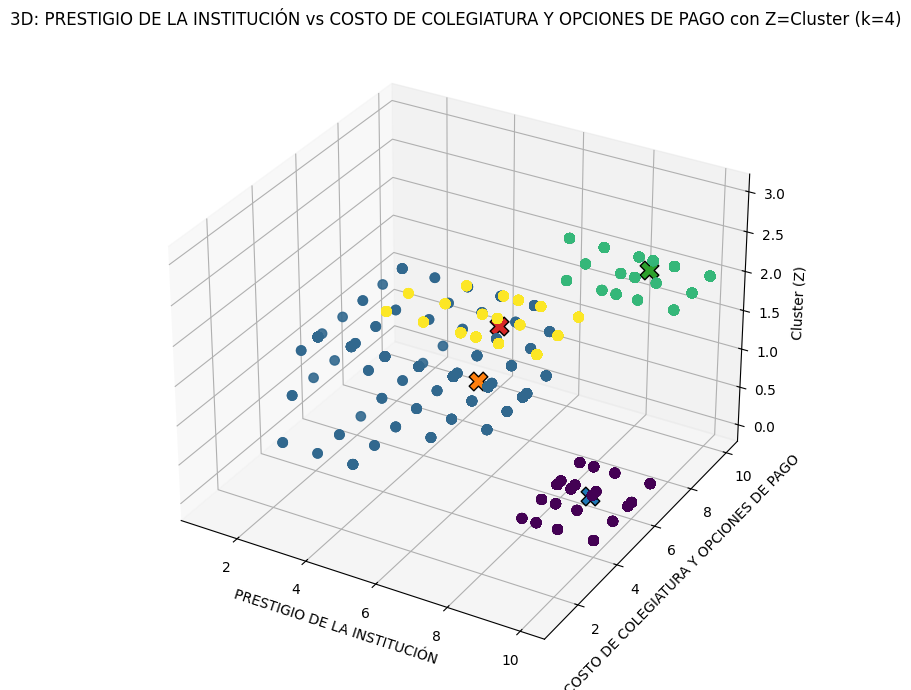

In [37]:
# === 3D usando las 2 variables + ID de cluster como Z ====
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (activa proyección 3D)
import matplotlib.pyplot as plt
import numpy as np

# Asegúrate de haber corrido previamente:
# - K-Means final (df con columna "Cluster")
# - variables = ["PRESTIGIO DE LA INSTITUCIÓN", "COSTO DE COLEGIATURA Y OPCIONES DE PAGO"]
x_col, y_col = variables[0], variables[1]

# Copia para graficar
df_plot = df[[x_col, y_col, "Cluster"]].copy()

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(
    df_plot[x_col],
    df_plot[y_col],
    df_plot["Cluster"],           # Z = etiqueta de cluster (visual)
    c=df_plot["Cluster"],         # color por cluster (matplotlib asigna una paleta por defecto)
    s=45,
    alpha=0.9
)

# Etiquetas y título
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel("Cluster (Z)")
ax.set_title(f"3D: {x_col} vs {y_col} con Z=Cluster (k={k_opt})")

# Opcional: marcar centroides también en 3D (Z = id del cluster)
for k_idx, (cx, cy) in enumerate(k_centroids_original[:, :2]):
    ax.scatter(cx, cy, k_idx, s=180, marker='X', edgecolor='black')

plt.tight_layout()
plt.show()


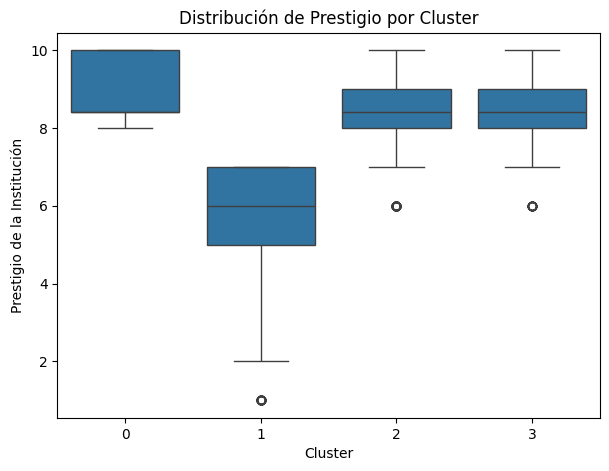

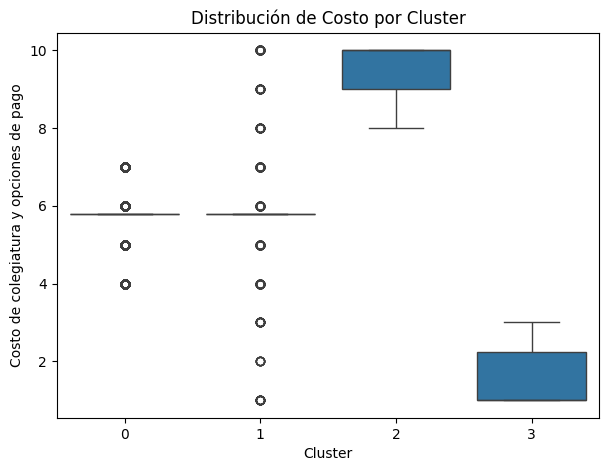

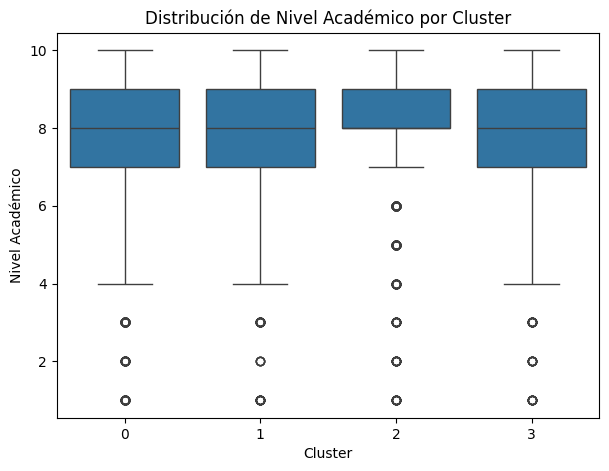

In [38]:
#  Boxplots con tus variables 
import seaborn as sns


cluster_results = df.copy()
cluster_results["Cluster Labels"] = clustering_model.labels_

#  Boxplot 1: Prestigio por cluster 
plt.figure(figsize=(7,5))
sns.boxplot(
    data=cluster_results,
    x="Cluster Labels",
    y="PRESTIGIO DE LA INSTITUCIÓN",
)
plt.title("Distribución de Prestigio por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Prestigio de la Institución")
plt.show()

#  Boxplot 2: Costo por cluster 
plt.figure(figsize=(7,5))
sns.boxplot(
    data=cluster_results,
    x="Cluster Labels",
    y="COSTO DE COLEGIATURA Y OPCIONES DE PAGO",
)
plt.title("Distribución de Costo por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Costo de colegiatura y opciones de pago")
plt.show()

#  Boxplot 3: Nivel Académico por cluster 
plt.figure(figsize=(7,5))
sns.boxplot(
    data=cluster_results,
    x="Cluster Labels",
    y="NIVEL ACADÉMICO",
)
plt.title("Distribución de Nivel Académico por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Nivel Académico")
plt.show()
